In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from accuracy import accuracy_stats_of_a_set
%matplotlib inline
sns.set()
plt.style.use('../.mplstyle')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.figsize'] = 12,8
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_colwidth', 0)

In [2]:
fnames = glob.glob(f"../exps/arith_what_is/**/*.tsv", recursive=True)

In [3]:
fnames[0].split('/')[3]

'seed_0'

In [6]:
def plot_a_set(fnames, title="validation set", ax=None):
    dfs = []
    for fname in fnames:
        print(fname)
        accuracy = accuracy_stats_of_a_set(fname)
        df = pd.DataFrame(accuracy).transpose().sort_index()
        paths = fname.split('/')
        name = paths[4] + "/" + paths[7]
        df['model'] = name
        df['seed'] = paths[3].split('_')[-1]
        dfs.append(df)
    df = pd.concat(dfs, axis=0)
    sns.barplot(ax=ax, data=df, y='exact_match', x=df.index, hue='model').set(title=title)
    for value in ax.containers:
        ax.bar_label(value,)

../exps/arith_what_is/seed_0/PromptTuningPostfixLM/EleutherAI/gpt-j-6B/step_10/lr_0.001/checkpoints/iter-15-test.tsv
../exps/arith_what_is/seed_0/PromptTuningCoderLM/EleutherAI/gpt-j-6B/step_10/lr_0.001/checkpoints/iter-15-test.tsv
../exps/arith_what_is/seed_0/PromptTuningLM/EleutherAI/gpt-j-6B/step_20/lr_0.001/checkpoints/iter-15-test.tsv
../exps/arith_what_is/seed_0/PromptTuningLM/EleutherAI/gpt-j-6B/step_10/lr_0.001/checkpoints/iter-15-test.tsv
../exps/arith_what_is/seed_2/PromptTuningPostfixLM/EleutherAI/gpt-j-6B/step_10/lr_0.001/checkpoints/iter-15-test.tsv
../exps/arith_what_is/seed_2/PromptTuningCoderLM/EleutherAI/gpt-j-6B/step_10/lr_0.001/checkpoints/iter-15-test.tsv
../exps/arith_what_is/seed_2/PromptTuningLM/EleutherAI/gpt-j-6B/step_20/lr_0.001/checkpoints/iter-15-test.tsv
../exps/arith_what_is/seed_2/PromptTuningLM/EleutherAI/gpt-j-6B/step_10/lr_0.001/checkpoints/iter-15-test.tsv
../exps/arith_what_is/seed_3/PromptTuningPostfixLM/EleutherAI/gpt-j-6B/step_10/lr_0.001/checkpoi

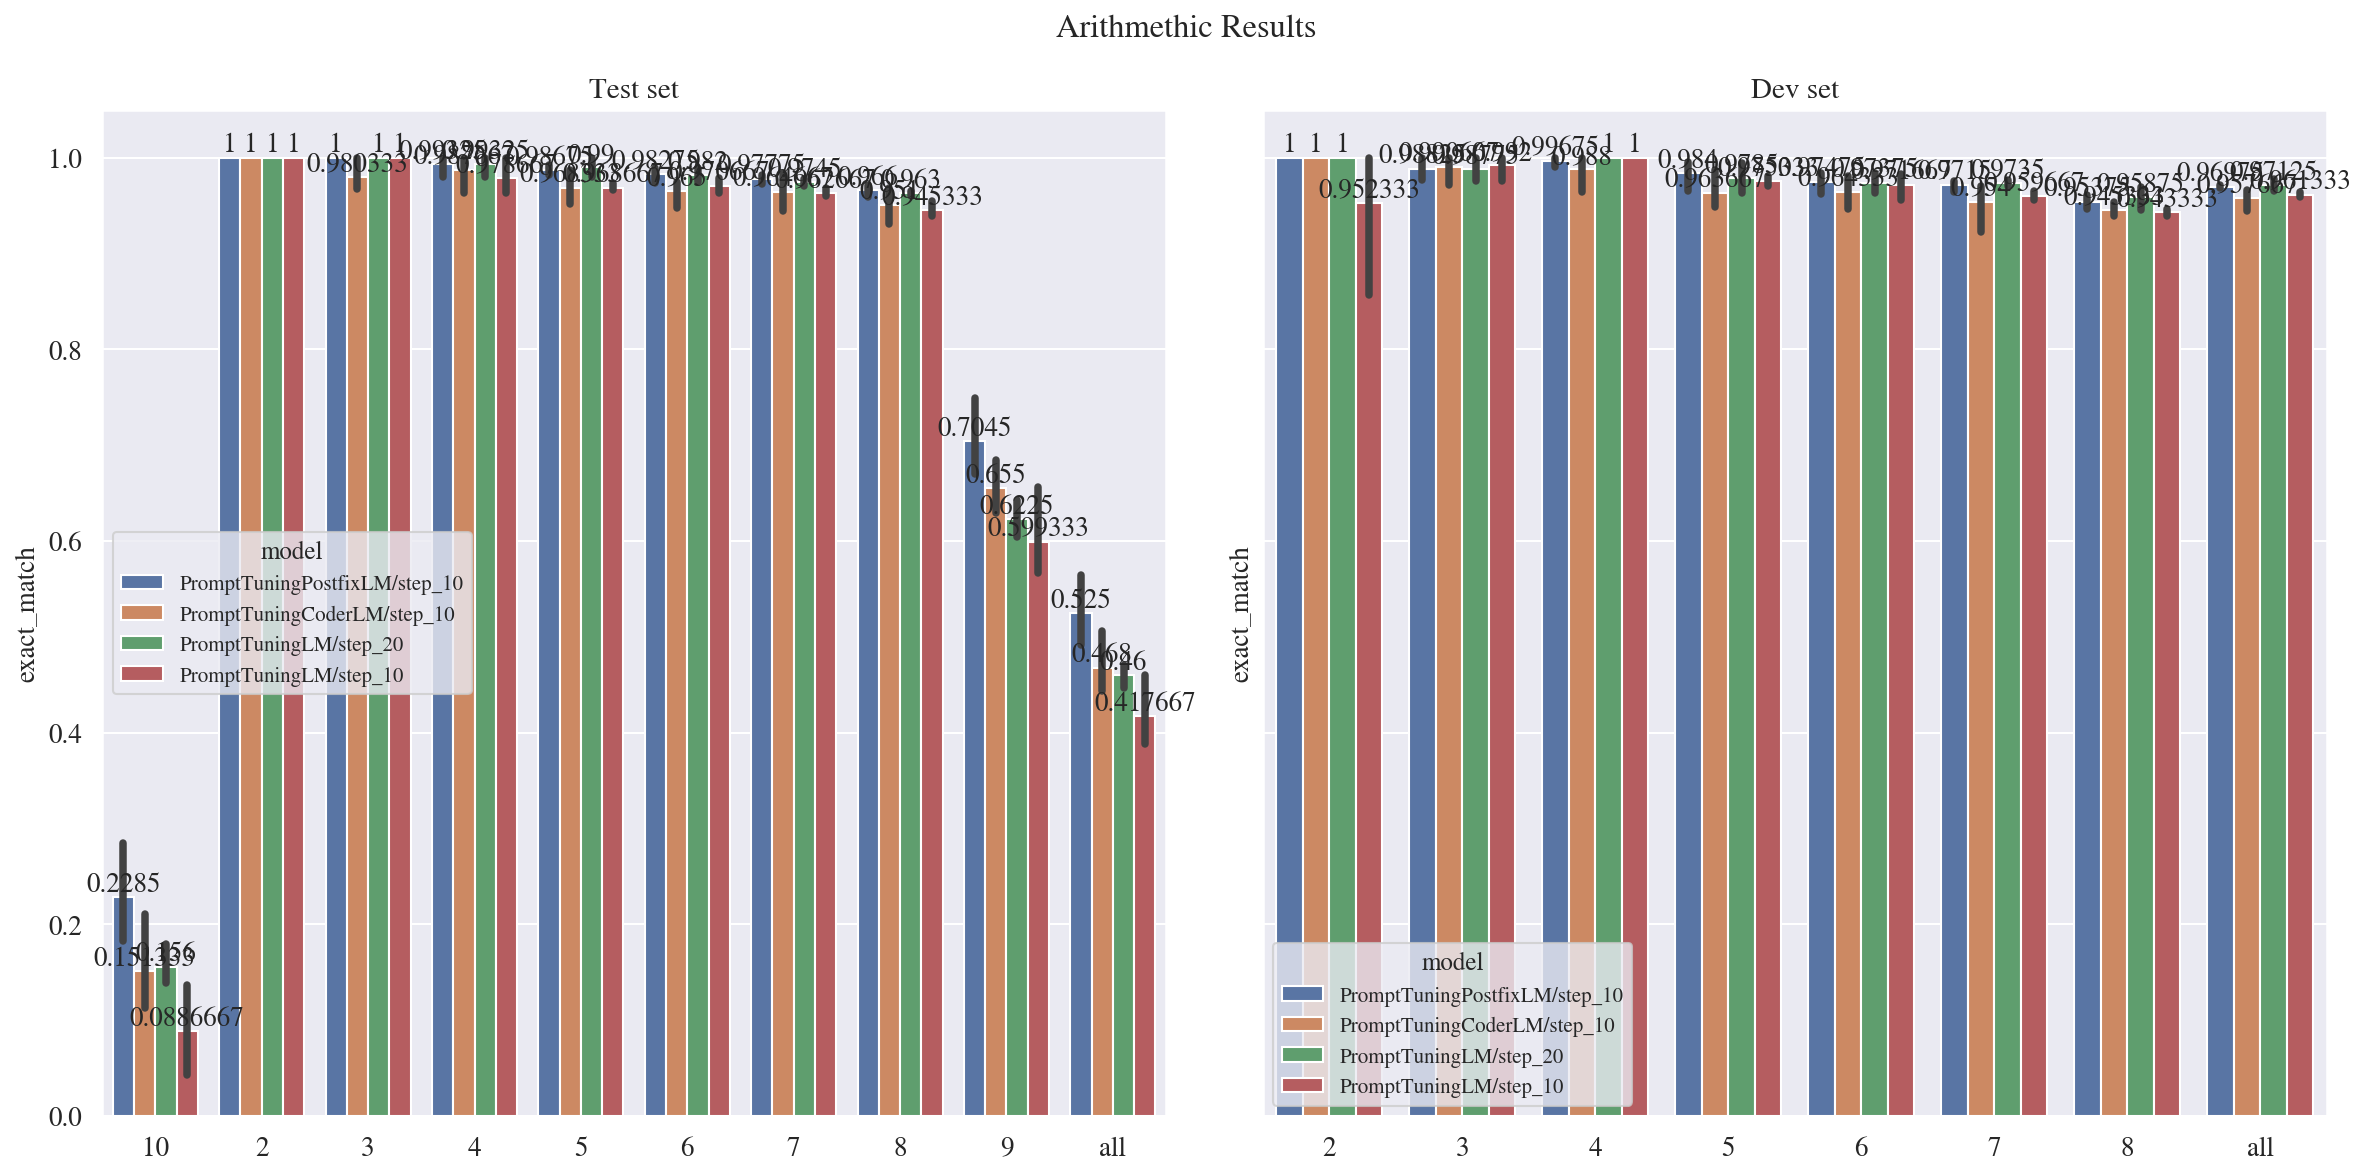

In [11]:

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16,8))
fig.suptitle('Arithmethic Results')
test_set = [fname for fname in fnames if 'test' in fname and 'coder' not in fname and 'step_12/' not in fname and 'step_1/' not in fname]
val_set = [fname for fname in fnames if 'val' in fname and 'coder' not in fname and 'step_12/' not in fname and 'step_1/' not in fname]
plot_a_set(test_set, ax=axes[0], title="Test set")
plot_a_set(val_set, title='Dev set', ax=axes[1])

In [ ]:
fig